# <center> Экзамен по "Науке о данных" </center>

Время выполнения заданий - 3 часа (11:00 - 14:00). 

Экзамен включает 3 обязательных задания для получения максимальной оценки (100 баллов) и 30 бонусных баллов.

До 14:00 необходимо сдать задание на Github Classroom в формате .ipynb, указав имя, фамилию и группу в названии файла, и загрузить свой код по каждой задаче на Яндекс.Контест https://contest.yandex.ru/contest/18973/enter для проверки на плагитат. 

Уточнения условия, если они будут, появятся по ссылке https://www.overleaf.com/read/kbwtcskdtbbv, в телеграм канале @room112, и в чате «Науки о данных».


In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as sts
from scipy.optimize import minimize
seed = 95
plt.style.use('seaborn')

### Задача про блуждание (35 баллов)

Шерлок Холмс расследует дело о пропаже бюллетеней на избирательном участке. Ватсон заметил, что всегда во время своих размышлений Холмс ходит ровно по прямой. Предположим, что в начале движения Шерлок находится в точке с координатой $0$. В каждый момент времени его координата изменяется на $\Delta x$ метров, где $\Delta x$ — случайная величина, имеющая стандартное нормальное распределение. Эта величина прибавляется к текущей координате после каждого шага и может принимать положительные и отрицательные значения.

1. Постройте график изменения положения Шерлока (его координаты на прямой) за $1000$ шагов. По горизонтали – количество пройденных шагов, по вертикали – положение Шерлока.[**5 баллов**]

2. Постройте для траектории положения Шерлока из предыдущего пункта график изменения выборочного среднего и дисперсии для $\Delta x$. По горизонтали – количество шагов, по вертикали – значения выборочного среднего и выборочной дисперсии. [**10 баллов**]

3. Проведите $10^3$ экспериментов по 500 шагов. Продемонстрируйте на одном графике $15$ случайных траекторий из проведенных экспериментов. [**10 баллов**]

4. Добавьте на график из предыдущего пункта усредненную по всем экспериментам траекторию выборочной дисперсии для каждого шага. [**10 баллов**]

##1

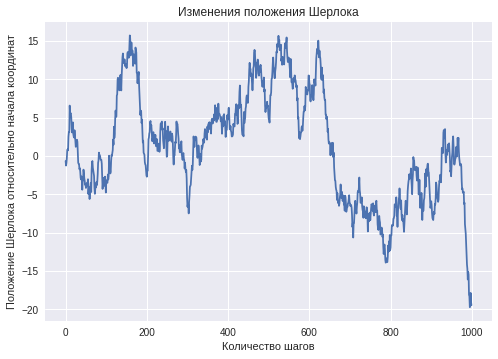

In [156]:
np.random.seed(seed)
shagi = np.random.normal(size=1000)
sher = np.cumsum(shagi)
plt.plot(sher)
plt.title('Изменения положения Шерлока')
plt.xlabel('Количество шагов')
plt.ylabel('Положение Шерлока относительно начала координат')
plt.show()

##2

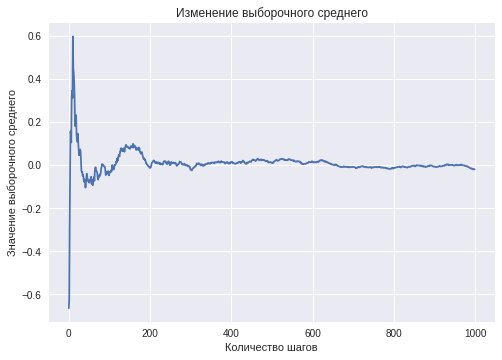

In [157]:
kolvo = np.arange(1,1001)
plt.plot(sher/kolvo)
plt.title('Изменение выборочного среднего')
plt.xlabel('Количество шагов')
plt.ylabel('Значение выборочного среднего')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


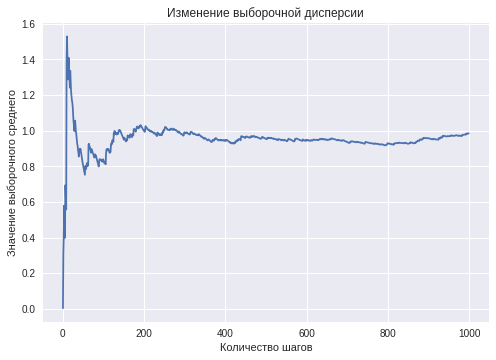

In [158]:
#разложим формулу несмещенной дисперсии и нарисуем график
plt.plot((np.cumsum(shagi**2) - 2*sher*sher/kolvo + kolvo*(sher/kolvo)**2)/(kolvo-1))
plt.title('Изменение выборочной дисперсии')
plt.xlabel('Количество шагов')
plt.ylabel('Значение выборочного среднего')
plt.show()

##3

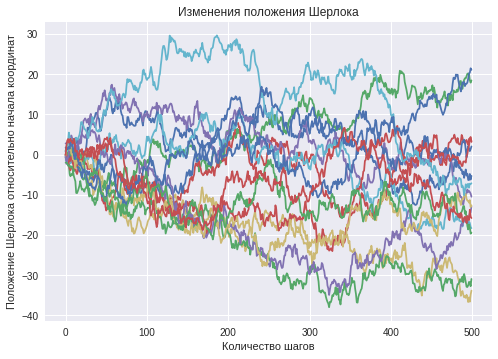

In [159]:
np.random.seed(seed)
shagi1 = np.random.normal(size=(10**3,500))
sher1 = np.cumsum(shagi1, axis = 1)
x = np.random.choice(np.arange(1,1001), size=15)
for i in x:
  plt.plot(sher1[i])
  #plt.legend(i, fontsize = 'medium')
plt.title('Изменения положения Шерлока')
plt.xlabel('Количество шагов')
plt.ylabel('Положение Шерлока относительно начала координат')
plt.show()

##4

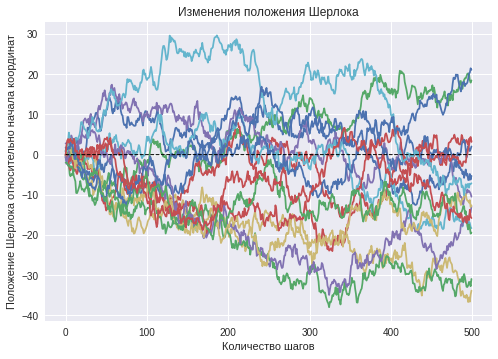

In [260]:
#выборочное среднее
np.random.seed(seed)
shagi1 = np.random.normal(size=(10**3,500))
sher1 = np.cumsum(shagi1, axis = 1)
x = np.random.choice(np.arange(1,1001), size=15)
kolvo1 = np.arange(1, 501)
sred = np.sum(shagi1, axis = 0)/1000/kolvo1
for i in x:
  plt.plot(sher1[i])
  #plt.legend(i, fontsize = 'medium')
plt.plot(sred, '--', linewidth=1 , color = 'black')
plt.title('Изменения положения Шерлока')
plt.xlabel('Количество шагов')
plt.ylabel('Положение Шерлока относительно начала координат')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


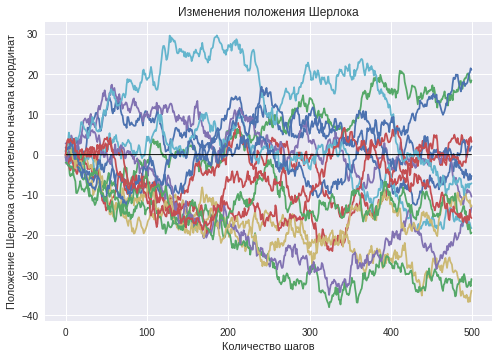

In [259]:
#для дисперсии
np.random.seed(seed)
shagi1 = np.random.normal(size=(10**3,500))
sher1 = np.cumsum(shagi1, axis = 1)
x = np.random.choice(np.arange(1,1001), size=15)
kolvo1 = np.arange(1, 501)
sred = np.sum(shagi1, axis = 0)/1000/kolvo1
for i in x:
  plt.plot(sher1[i])
  #plt.legend(i, fontsize = 'medium')
plt.plot((np.cumsum(shagi1.sum(axis=0)/1000**2) - 2*np.cumsum(shagi1.sum(axis=0)/1000)*sred + kolvo1*(sred)**2)/(kolvo1-1), linewidth=1 , color = 'black')#дисперсия
plt.title('Изменения положения Шерлока')
plt.xlabel('Количество шагов')
plt.ylabel('Положение Шерлока относительно начала координат')
plt.show()

### Парковки от мэра (40 баллов + 15 бонусных баллов)

Перед выборами в центре города открыли неразмеченную парковку длиной $100$ метров. Каждый приезжающий водитель случайным образом выбирает место длиной $2$ метра, и если место оказалось свободным, встает на парковку до конца дня. Если он не помещается в выбранный отрезок, то водитель в нервном состоянии уезжает с парковки. За один день на парковку пытается встать $1000$ проезжающих мимо водителей. Для выполнения всех пунктов заданий проведите $2000$ симуляций. 

*Hint: Для простоты будем считать, что выбор точки на парковке - это центр машины.*

1. В среднем сколько машин оказываются припаркованы к концу дня? [**20 баллов**]

2. Постройте $95$\%-ый доверительный интервал для ожидаемого количества машин припаркованных к концу дня. [**10 баллов**]

3. Постройте $95$\%-ый доверительный интервал для ожидаемого количества свободного места на парковке к концу дня (в метрах). [**10 баллов**]

4. После возникшего хаоса на парковку добавили регулярную разметку для мест длиной $2$ метра, но водители разделились на два лагеря — тех, кто соблюдает и не соблюдает правила разметки. С вероятностью $p$ приезжает честный водитель и занимает случайное свободное место строго по разметке. Водители второго лагеря паркуются, как раньше. Нарисуйте график, где по оси ординат – процент честных водителей, а по оси абсцисс – процент свободного места на парковке к концу дню для вероятностей $p$ равным от $0$ до $1$ с шагом в $5$\%. Для каждого порога вероятности проведите по $500$ симуляций. [**15 бонусных баллов**]

In [182]:
np.random.seed(seed)
mashini = []
for j in tqdm(range(2000)):
  cnt = 0
  mesto = np.array([0])
  for i in range(1000):
    right = np.random.uniform(2,100) # Правый край машины
    if min(abs((mesto - right))) > 2:
      cnt +=1
      mesto = np.append(mesto, right)
    else:
      i+=1
  mashini.append(cnt)
np.array(mashini).mean()

100%|██████████| 2000/2000 [00:22<00:00, 87.09it/s]


36.338

In [183]:
sred = np.array(mashini).mean()
alpha = 0.95
disp = np.array(mashini).var(ddof=1)
n = len(np.array(mashini))
left = sred - sts.norm.ppf(1- alpha/2)*((disp/n)**0.5)
right = sred + sts.norm.ppf(1- alpha/2)*((disp/n)**0.5)
print(f'95%-ый доверительный интервал для ожидаемого количества машин припаркованных к концу дня:{left, right}')

95%-ый доверительный интервал для ожидаемого количества машин припаркованных к концу дня:(36.336046139479286, 36.339953860520716)


In [184]:
free = 100 - np.array(mashini)*2
sred = free.mean()
alpha = 0.95
disp = free.var(ddof=1)
n = len(free)
left = sred - sts.norm.ppf(1- alpha/2)*((disp/n)**0.5)
right = sred + sts.norm.ppf(1- alpha/2)*((disp/n)**0.5)
print(f'95%-ый доверительный интервал для ожидаемого количества свободного места на парковке к концу дня:{left, right}')

95%-ый доверительный интервал для ожидаемого количества свободного места на парковке к концу дня:(27.320092278958573, 27.32790772104143)


### Правдоподобие счастья (25 баллов + 15 бонусных баллов)

Загрузите набор данных по измерению уровня счастья в разных странах мира за 2019 год (**data.csv** в репозитории экзамена). Полное описание датасета доступно по ссылке на Kaggle: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

1. Постройте на графике гистограмму для уровня счастья (переменная Score) и ее функции плотности. Является ли распределение нормальным? [**5 баллов**]

2. Пусть уровень счастья – целевая вещественная переменная $y$, все $y_i$ независимы и нормальны $N(\mu, \sigma^2)$, где $\mu = a + b*x_i$. Выведите функцию правдоподобия и задачу для оптимизации поиска коэффициентов $a$, $b$ и $\sigma^2$. [**15 бонусных баллов**]

3. Оцените параметры с помощью метода максимального правдоподобия, если в роли $x_i$ выступает ВВП на душу населения (GDP per capita). [**10 баллов**]

4. Используя оценённые параметры и медианное значение ВВП на душу населения, оцените вероятность того, что уровень счастья будет больше 5.
[**10 баллов**]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [191]:
df = pd.read_csv('/content/drive/My Drive/data.csv')

In [ ]:
df

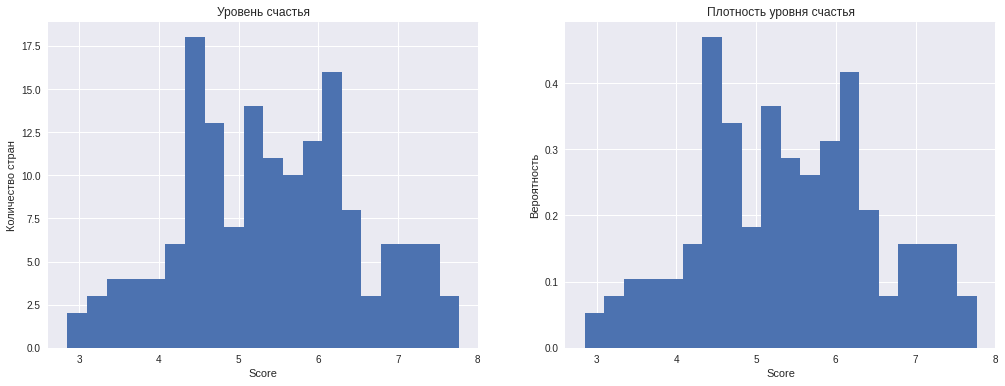

In [253]:
fig, ax = plt.subplots(ncols=2, figsize =(17,6))
ax[0].hist(df['Score'], bins = 20)
ax[0].set_title('Уровень счастья')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Количество стран')
ax[1].hist(df['Score'], bins = 20, density = True)
ax[1].set_title('Плотность уровня счастья')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('Вероятность')
plt.show()

Похоже на нормальное, но в центре маловато значений

In [241]:
def lkhd(theta, x):
  a = theta[0]
  b = theta[1]
  s2 = np.exp(theta[2])
  mu = (a + b * x)
  n = len(df['GDP per capita'])
  lklh = - 0.5 * n * np.log(s2) - 0.5 * np.sum((x - mu) ** 2) / s2
  return -lklh

In [246]:
init = [0, 0, 0]
k = minimize(lkhd, init, args = df['GDP per capita'].values).x
a = k[0]
b = k[1]
s2 = np.exp(k[2])
print(a, b, s2)

-1.750284188645374e-09 0.9999999956476279 4.495214172076711e-17


In [249]:
mu = (a + b * df['GDP per capita'].median())
mu

0.9599999940714385

In [254]:
prob = 1- sts.norm(mu, s2**0.5).cdf(5)
print(f'Вероятнсть, что уровень счастья больше 5:{prob}')

Вероятнсть, что уровень счастья больше 5:0.0
